# Clusterization analysis

## 0. Setting up the evironment

Download a library that allows to use widgets on plots

In [48]:
!pip install ipympl -q

Imports for plotting

In [49]:
import matplotlib.pyplot as plt
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib ipympl

Load a language model for preprocessing text in Russian

In [50]:
!python -m spacy download ru_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [51]:
import spacy

nlp = spacy.load("ru_core_news_sm", disable=["ner", "parser"])

A function to produce a lemmatized version of the input text

In [52]:
def preprocessor(text):
  lemmas = list()
  doc = nlp(text)
  for token in doc:
    if token.is_alpha and token.is_stop == False:
      lemma = token.lemma_
      lemmas.append(lemma)
  return ' '.join(lemmas)

## 1. The data

In [53]:
import pandas as pd

Read the dataset

In [54]:
df = pd.read_csv('/content/drive/MyDrive/2024/компьютерная лингвистика/unsupervised learning/sports_articles.tsv', sep='\t')
df

,headline,summary
0,Наказание за самоуверенность: Малыхин проиграл...,Анатолий Малыхин в Бангкоке потерпел сенсацион...
1,«Находится на низком уровне»: Васильев — о ско...,Если Камила Валиева по своим физическим и мент...
2,"Победа «Спартака» в дерби, долги «Лады» по зар...",«Спартак» в третий раз обыграл ЦСКА в нынешнем...
3,«Верить ему нельзя»: глава World Athletics Коу...,Президент World Athletics Себастьян Коу сообщи...
4,Затмил дуэль Кучерова и Федотова: Капризов офо...,Кирилл Капризов трижды ассистировал партнёрам ...
...,...,...
904,Короли разделки: Большунов одержал 20-ю победу...,Александр Большунов завоевал третью золотую ме...
905,"Тримуф «Канзас-Сити» в овертайме, магия Махоум...",«Канзас-Сити» взял верх над «Сан-Франциско» в ...
906,"Хет-трик Афифа с пенальти, подачи Адингры и ка...",Катар и Кот-д'Ивуар одержали победы в финалах ...
907,«Она просто быстрее и мощнее»: Касаткина уступ...,Дарья Касаткина не завоевала титул на турнире ...


## 2. Vectorization

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Feature extraction

In [56]:
documents = df['summary'].to_list()

Build the Document-Term Matrix

In [57]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

## 3. Dimensionality reduction techniques

In [58]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**PCA (Principal Component Analysis)**: reduces the dimensionality of the data while preserving as much of the original variance as possible.

**t-SNE (t-distributed stochastic neighbor embedding)**: a statistical method for visualizing high-dimensional data.


In [59]:
dim_red = PCA(n_components=2)
# dim_red = TSNE(
#     n_components=2,          # 2D for visualization
#     perplexity=14,           # Lower value to focus on local structure
#     learning_rate=100,       # Higher learning rate for cluster exaggeration
#     early_exaggeration=10,   # Increase early exaggeration
#     max_iter=500,            # More iterations for better convergence
#     random_state=42
# )

X_reduc = dim_red.fit_transform(X.toarray())

## 4. Cluster analysis

A simple function to plot clusters

In [60]:
def plot(documents, X):
  plt.figure(figsize=(14, 8))
  plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
  plt.title('Plot')

  for i, text in enumerate(documents):
    plt.annotate(i, (X[i, 0], X[i, 1]), fontsize=6)

  plt.grid(True)
  plt.show()

Plot the clusters

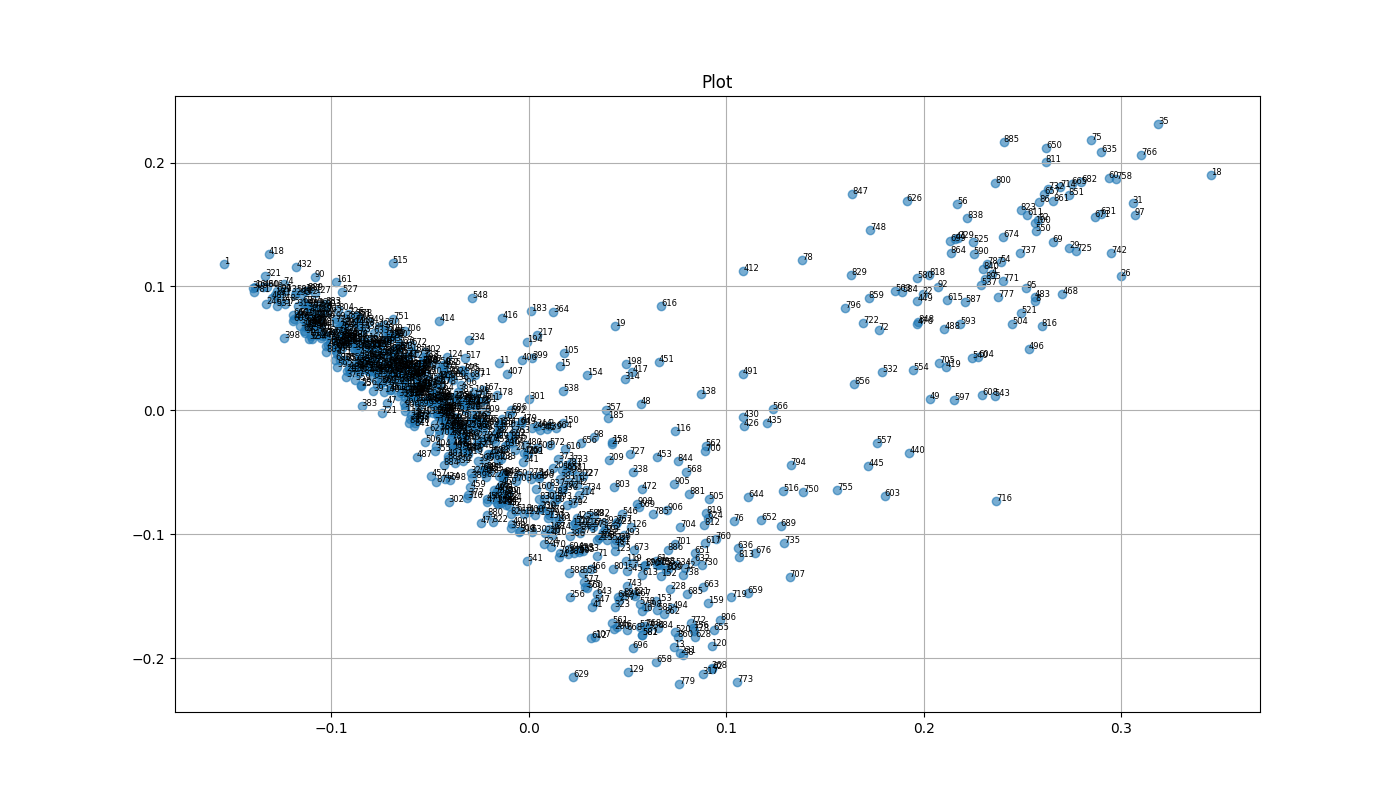

In [61]:
plot(documents, X_reduc)

Index lookup in dataframe

In [62]:
df.loc[[610, 622, 634, 649, 664, 687], 'headline'].to_list()

['«Мне очень жаль»: Непомнящий спасся чёрными в партии с Каруаной и помог Доммараджу выиграть Турнир претендентов',
 'Оголённые провода: Непомнящий упустил единоличное лидерство на Турнире претендентов, Горячкина и Лагно — шансы на победу',
 'Качели Непомнящего, ничьи Лагно и поражение Горячкиной: как стартовал второй круг Турнира претендентов',
 'Валидольные ничьи Непомнящего, вторая победа Горячкиной и упущенные очки Лагно: как проходит Турнир претендентов',
 'Лидерство Непомнящего, победа Горячкиной над Музычук и обидная ничья Лагно: как стартовал Турнир претендентов в Торонто',
 'Взлёты Горячкиной, стабильность Лагно и концентрация китаянок: чем интересен турнир претенденток по шахматам']

## 5. Clustering the data using K-means

Another function to plot the clusters

In [63]:
def plot_kmeans(X, num_clusters):
  plt.figure(figsize=(12, 8))

  for cluster in range(num_clusters):
      plt.scatter(
          X[labels == cluster, 0],
          X[labels == cluster, 1],
          label=f'Cluster {cluster + 1}',
          alpha=0.7
      )

  plt.title('2D visualization of news articles clusters')
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.legend()
  plt.show()

## Cluster the data using K-means

In [64]:
from sklearn.cluster import KMeans

Train the model and plot the predictions

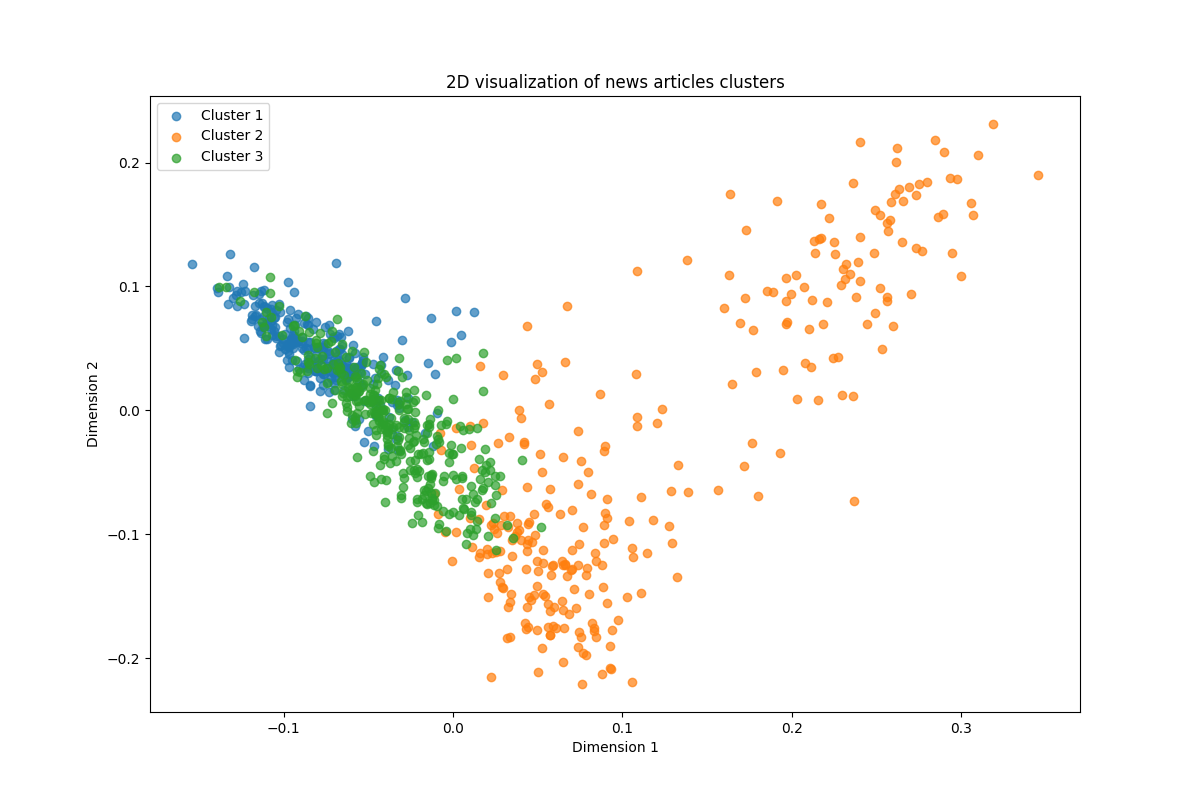

In [65]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X.toarray())

plot_kmeans(X_reduc, num_clusters)